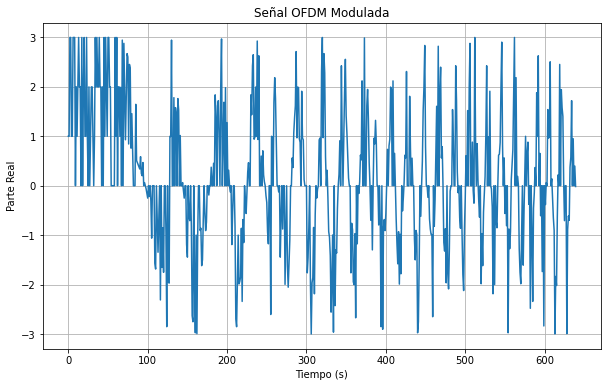

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
num_subcarriers = 64  # Número de subportadoras
subcarrier_spacing = 15e3  # Espaciado entre subportadoras en Hz
symbol_duration = 1e-3  # Duración de un símbolo en segundos
sampling_rate = 2e6  # Tasa de muestreo en muestras por segundo
guard_interval = 0.2  # Duración del intervalo de guarda en relación con el símbolo

# Generar datos aleatorios para cada subportadora (simulando símbolos QAM)
num_symbols = 10  # Número de símbolos a enviar
data = np.random.randint(0, 4, size=(num_subcarriers, num_symbols))  # 4-QAM (16-QAM) symbols

# Generar subportadoras con modulación QAM
subcarriers = np.zeros((num_subcarriers, num_symbols), dtype=np.complex_)
for i in range(num_subcarriers):
    subcarrier_freq = i * subcarrier_spacing
    subcarriers[i, :] = np.exp(1j * 2 * np.pi * subcarrier_freq * np.arange(num_symbols) / sampling_rate)

# Asignar los símbolos a las subportadoras
ofdm_signal = np.zeros((num_subcarriers, num_symbols), dtype=np.complex_)
for i in range(num_symbols):
    ofdm_signal[:, i] = data[:, i] * subcarriers[:, i]

# Tiempo total de la señal
total_time = num_symbols * symbol_duration

# Eje de tiempo para la señal modulada
time = np.linspace(0, total_time, num_symbols * int(symbol_duration * sampling_rate), endpoint=False)

# Graficar la señal modulada OFDM
plt.figure(figsize=(10, 6))
plt.plot(np.real(ofdm_signal.T).flatten())
plt.title('Señal OFDM Modulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Parte Real')
plt.grid(True)
plt.show()
